In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST

import numpy as np
import matplotlib.pyplot as plt

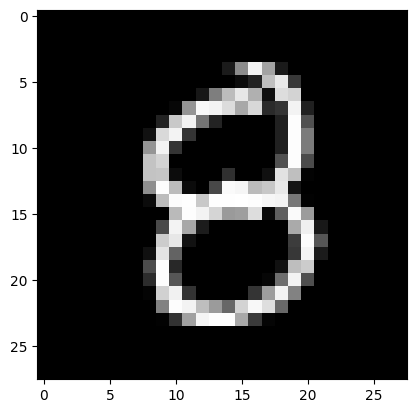

In [12]:
train_set = MNIST(root="datasets/", train=True, download=True, transform=ToTensor())
test_set = MNIST(root="datasets/", train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.imshow(np.transpose(images[2].numpy(), (1, 2, 0)), cmap='gray')

In [13]:
def patchify(images, n_patches):
    n, c, h, w = images.shape # (N, 1, 28, 28)

    assert h == w # Patchify method is implemented for square images only

    patches = torch.zeros(n, n_patches**2, h*w*c // n_patches**2) # new shape --> (n, 49, (28*28*1)/49) --> (n, 49, 16) --> her bir resim için 49 satırdan ve her bir satırın 16 uzunluğunda olduğu bir tensor.
    patch_size = h // n_patches # 28 / 7 = 4 --> every patch size 4x4

    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[:, i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size]
                patches[idx, i*n_patches + j] = patch.flatten()

    return patches

In [14]:
patches = patchify(images, 7) # Burada patch boyutunu 7 belirledik.

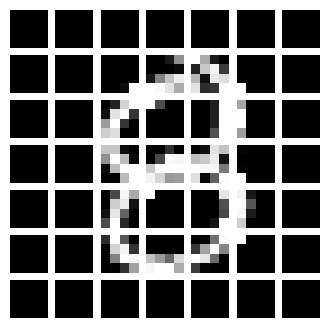

In [15]:
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[2]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = torch.reshape(patch, (4, 4, 1))
    plt.imshow(patch_img.numpy(), cmap='gray')
    plt.axis("off")